In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

DARK_READER = True
if DARK_READER:
    plt.rcParams.update({
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "lightgray",
        "axes.labelcolor": "white",
        "axes.titlecolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    })

In [3]:
import numpy as np

In [4]:
np.random.seed(42)
A = np.random.randn(3,4)
B = np.random.randn(3,4)
print(f"A =\n{A}")
print(f"\nB =\n{B}")
print(f"\nnp.maximum(A, B) =\n{np.maximum(A, B)}")

A =
[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]]

B =
[[ 0.24196227 -1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819]]

np.maximum(A, B) =
[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337  0.31424733  1.57921282  0.76743473]
 [ 1.46564877  0.54256004  0.0675282  -0.46572975]]


**Rmk.**

- `np.maximum` is a different function from `np.max`

In [5]:
def norm_(x, y, p):
    if p <= 0:
        raise ValueError("p norm: p must > 0")
    if p == float("inf"):
        return np.maximum(np.abs(x), np.abs(y))
    else:
        return (np.abs(x)**p + np.abs(y)**p)**(1/p)
        #return np.power(np.sum(np.power(np.abs(vec), p)), 1/p)

In [6]:
[norm_(3, 4, p) for p in [1, 2, 20, 50, 55, float("inf")]]

/home/phunc20/.virtualenvs/homl2e/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


[7.0, 5.0, 4.000633288976907, 2.374832927283653, nan, 4]

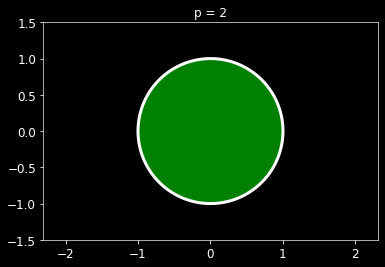

In [7]:
p = 2
xs = np.linspace(start=-1.5, stop=1.5, num=500)
ys = xs
X, Y = np.meshgrid(xs, ys)
Z = norm_(X, Y, p)
plt.contourf(X, Y, Z,
             levels=[0, 1],
             #cmap=plt.cm.bone,
             #colors=["r", "g", "b"],
             colors=("g",),
)
plt.contour(X, Y, Z,
            levels=[0, 1],
            colors=("w",),
            linewidths=(3,),
)
plt.axis("equal")
#plt.xticks(np.range(-1.5,1.5,0.5))
#plt.grid(True)
plt.title(f"p = {p}");

In [8]:
def draw_ball(p=2):
    xs = np.linspace(start=-1.5, stop=1.5, num=500)
    ys = xs
    X, Y = np.meshgrid(xs, ys)
    Z = norm_(X, Y, p)
    plt.contourf(X, Y, Z,
                 levels=[0, 1],
                 #cmap=plt.cm.bone,
                 #colors=["r", "g", "b"],
                 colors=("g",),
    )
    plt.contour(X, Y, Z,
                levels=[0, 1],
                colors=("w",),
                linewidths=(3,),
    )
    plt.axis("equal")
    #plt.xticks(np.range(-1.5,1.5,0.5))
    #plt.grid(True)
    plt.title(f"p = {p}");

In [9]:
import ipywidgets as widgets
from ipywidgets import interact, interactive

In [10]:
ball_widget = interactive(
    draw_ball,
    #r = (0, 2, 0.1),
    p = (0.1, 1e6, 0.1),
)
display(ball_widget)

interactive(children=(FloatSlider(value=2.0, description='p', max=1000000.0, min=0.1), Output()), _dom_classes…

**Rmk.**

- When `p < 1`, the **"ball"** becomes _**no longer convex**_.